***Захватаев Михаил Дмитриевич ABD-11***

# Анализ статистики видео, попавших в тренды YouTube

![title](./Images/YouTube.png "ShowMyImage")

**Вступление** 

YouTube ведёт список самых популярных видео на платформе, используя комбинацию различных факторов: кол-во просмотров, репостов, комментариев, лайков и т.д. По заявлению автора, представляют собой структурно улучшенную версию оригинала  
Датасет взят с сайта Kaggle, изучить его самостоятельно можно, перейдя по ссылке: https://www.kaggle.com/datasnaek/youtube-new 

В рамках данного проекта будут рассмотрены данные по России

**Описание данных таблиц .csv**
1. video_id - уникальный идентификатор видео -- STRING 


2. trending_date - дата попадания в тренды -- STRING


3. title - название видео -- STRING


4. channel_title - название канала -- STRING


5. category_id - номер категории видео -- INT (сами категории в .json)


6. publish_time - точное время публикации видео -- DATE


7. tags - тэги к видео -- STRING


8. views - количество просмотров -- INT


9. likes - количество лайков -- INT


10. dislikes - количество дизлайков -- INT


11. comment_count - количество комментариев -- INT


12. tumbnail_link - ссылка на фото превью -- LINK


13. comments_disabled - комментарии выключены -- BOOL


14. raitings_disabled - рейтинг выключен -- BOOL


15. video_error_or_removed - видео недоступно удалено -- BOOL


16. description - описание -- STRING


**Цели**  
- Анализ факторов, влияющих на популярность видео 
- Статистический анализ с течением времени 
- Категоризация видео

**Вне рамок курса данные могут быть полезны в следующих задачах** 
- RNN для создания комментариев 
- Анализ настроений в комментариях под видео

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

## Первый взгляд и обработка
- RUS

In [2]:
df_r = pd.read_csv('./Data/RUvideos.csv', index_col='video_id')
df_r.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


Проверяем на наличие Nan

In [3]:
df_r.isna().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2464
dtype: int64

Заполним пропуски чертами : "----"

In [4]:
df_r['description'].fillna('----', inplace=True)
df_r.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

## Построим корреляционную карту

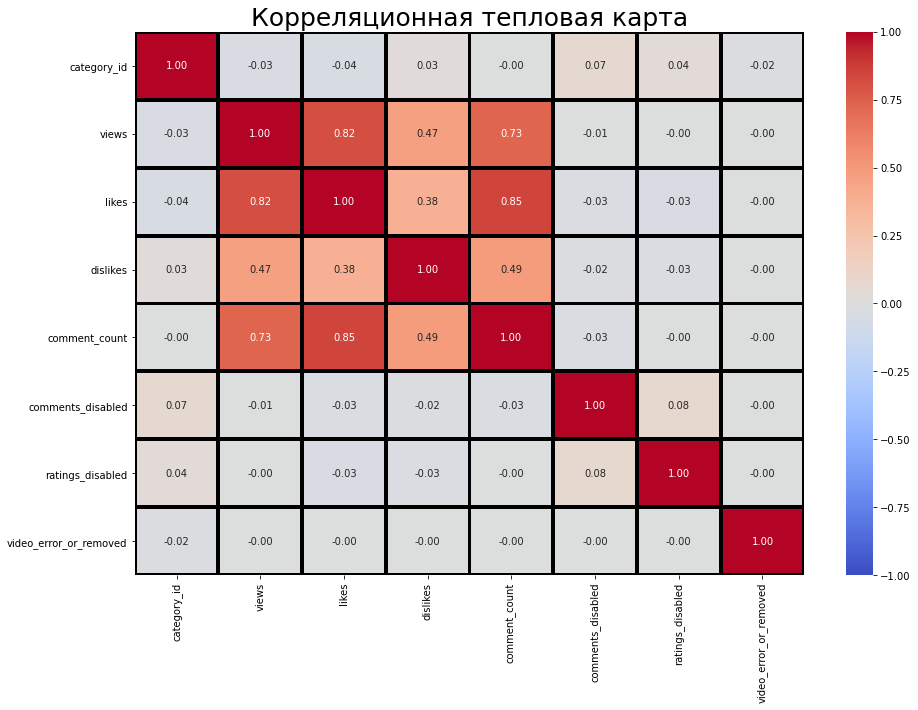

In [5]:
fig, axes = plt.subplots(figsize = (15,10))
sns.heatmap(df_r.corr(), ax = axes, fmt = '.2f', annot= True, linewidths =.05,vmin = -1,\
            vmax= 1, cmap ='coolwarm', linewidth=3, linecolor='black').set_title('Корреляционная тепловая карта',fontsize = '25')
plt.show()

## Рассмотрим ближе признаки с высокими значениями

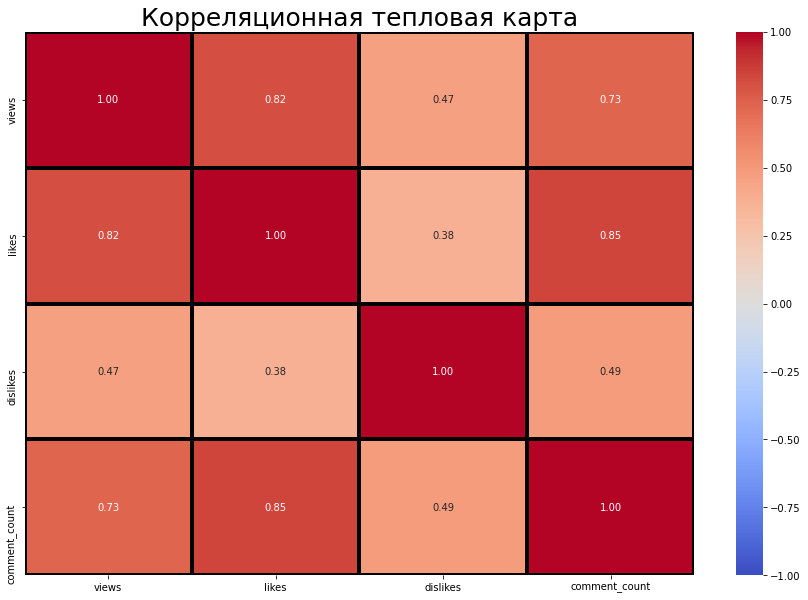

In [6]:
top_features = ['views', 'likes','dislikes','comment_count']

fig, axes = plt.subplots(figsize = (15,10))
sns.heatmap(df_r[top_features].corr(), ax = axes, fmt = '.2f', annot= True, linewidths =.05,vmin = -1,\
            vmax= 1, cmap ='coolwarm', linewidth=3, linecolor='black').set_title('Корреляционная тепловая карта',fontsize = '25')
plt.show()

- Можем наблюдать сильные взаимосвязи:
   - Лайки и просмотры (0.8)
   - Лайки и комментарии (0.8)
   - Просмотры и комментарии (0.7)

## Составим словарь вида {значение таблицы :  категория} из имеющегося файла .json

In [7]:
import json

In [8]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [9]:
def get_categoties_dict():

    res_d = {}
    
    with open('./Data/RU_category_id.json', 'r', encoding='utf-8') as fh:
        category_d = json.load(fh)
    for interior in category_d['items']:
        res_d[int(interior['id'])] = interior['snippet']['title']
    
    return res_d

In [10]:
categories = get_categoties_dict()

 ## Добавим столбец с названиями категорий для упрощения дальнейшего анализа

In [11]:
df_r['category_title'] = df_r['category_id'].map(categories)

In [12]:
df_r['category_title'].fillna('Nonprofits & Activism', inplace = True)

## Посмотрим на количество видео в трендах по категориям

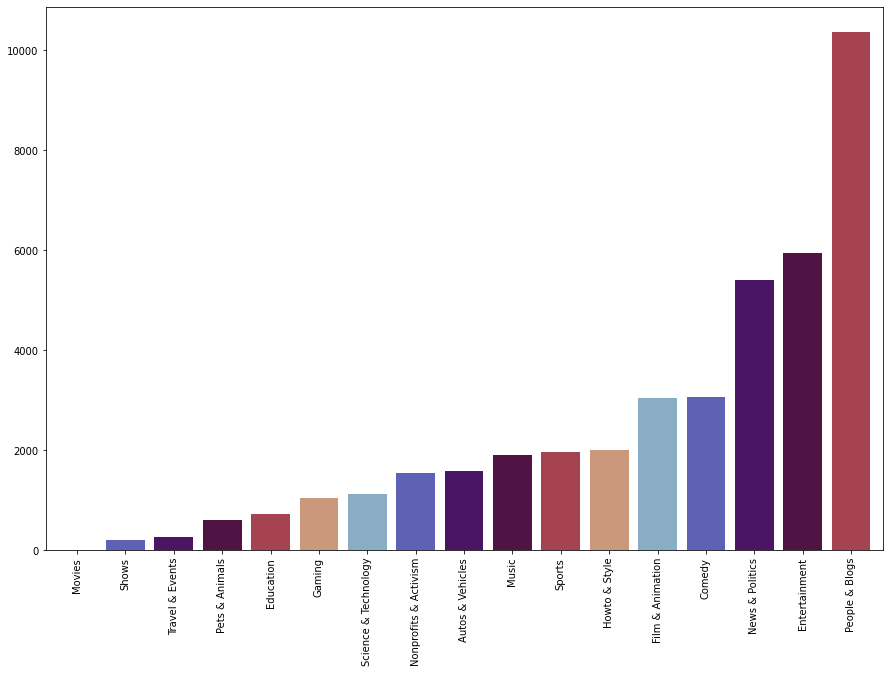

In [13]:
plt.figure(figsize=(15,10))
ax = df_r['category_title'].value_counts().sort_values(ascending=True).plot.bar(width=0.8, color=sns.color_palette('twilight'))

## Процент от общего числа просмотров

In [14]:
init_notebook_mode(connected = True)

In [15]:
df_r_tmp = df_r.groupby(['category_title']).agg({'views':'sum'}).reset_index()
fig = [go.Pie(labels = df_r_tmp['category_title'], values = df_r_tmp['views'], hoverinfo = 'label')]
iplot(fig)

Категории с наибольшим кол-вом просмотров:
- Развлечения (21.3%)
- Музыка (16.4%)
- Люди и блоги (16%)
- Комедии (10.4%)
- Новости и политика (7.54%)

## Процент лайков от просмотров

In [16]:
df_r_tmp = df_r.groupby(['category_title']).agg({'views':'sum', 'likes':'sum'}).reset_index()
df_r_tmp = [go.Pie(labels = df_r_tmp['category_title'], values = df_r_tmp['likes']/df_r_tmp['views'], hoverinfo = 'label')]
plotly.offline.iplot(df_r_tmp, filename = 'category_title')

Категории, которым охотнее ставят лайки
- Музыка (9.77%)
- Некоммерчиские организации и активизм (9.14)
- Комедии (8.95)
- Наука и технологии (7.94)
- Игры (7.35)

## Процент дизлайков от просмотров

In [17]:
df_r_tmp = df_r.groupby(['category_title']).agg({'views':'sum', 'dislikes':'sum'}).reset_index()
df_r_tmp = [go.Pie(labels = df_r_tmp['category_title'], values = df_r_tmp['dislikes']/df_r_tmp['views'], hoverinfo = 'label')]
plotly.offline.iplot(df_r_tmp, filename = 'category_title')

Категории, которым охотнее ставят дизлайки
- Некоммерческие организации и активизм (28.9%)
- Новости и политика (13.1%)
- Люди и блоги (7.96%)
- Комедии (7.4%)
- Путешествия и события (5.31%)

## Процент комментариев от просмотров

In [18]:
df_r_tmp = df_r.groupby(['category_title']).agg({'views':'sum', 'comment_count':'sum'}).reset_index()
df_r_tmp = [go.Pie(labels = df_r_tmp['category_title'], values = df_r_tmp['comment_count']/df_r_tmp['views'], hoverinfo = 'label')]
plotly.offline.iplot(df_r_tmp, filename = 'category_title')

Категории, которым охотнее ставят дизлайки
- Некоммерческие организации и активизм (13.1%)
- Наука и технологии (11.4%)
- Музыка (6.98%)
- Путешествия и события (6.93%)
- Комедии (6.87%)

## Отношение лайков и дизлайков в категориях

In [19]:
df_r_tmp = df_r.groupby(['category_title']).agg({'likes':'sum', 'dislikes':'sum'}).reset_index()
df_r_tmp = [go.Pie(labels = df_r_tmp['category_title'], values = df_r_tmp['likes']/df_r_tmp['dislikes'], hoverinfo = 'label')]
plotly.offline.iplot(df_r_tmp, filename = 'category_title')

Категории с лучшим отношением лайки/дизлайки
- Как сделать .. и стиль (9.62%)
- Животные и домашние питомцы (8.99%)
- Наука и технологии (8.76%)
- Спорт (8.62%)
- Фильмы и анимация (7.77%)

# Вывод по нашим пирогам

- По зависимости лайков от просмотров сложно сказать про общую оценку категории. Видно на примере новостей и активизма. Эти категории попали в топ категорий котороым ставят и лайки, и дизлайки. 

 
- Можно сказать про то, что определенной средней эмоции от просмотра этих категорий нет, т.к. у многих она вызывает положительные эмоции и у многих отрицательные. Самое главное - вызывает и идет сильная реакция. 


- В случае с активизмом это еще и видно по проценту комментриев от просмотров. Это логично, т.к. зачастую ролики этой категории достаточно провокационные и у многих появляется желание высказаться


- ***Наш вариант -- наука и технологии***
  - имеет среднюю позицию по кол-ву просмотров
  - жадно отгрызает 8% всех лайков
  - охотно делится дизлайками с другими категориями оставляя себе лишь 3% людей, не верящих в науку
  - пробивает на комментарий более 11% зрителей, занимая с большим отрывом от 3го и незначительным отставанием от 1го, 2е место
  - в 9 раз чаще этой категории ставят лайки, нежели дизлайки

*Что пишет нам YouTube про отбор трендов?*

Видео, которые попадают в тренды такие, что:
- не содержат контента, который YouTube считаем шокирующим, для взрослых итд.


Далее при соответствии всем прихотям идет анализ следующей статистики:
- кол-во просмотров
- прирост просмотров
- широта просмотра видео на прочих сайтах видеохостинга (не YouTube)
- актуальность (в плане времени, прошедшего с момента публикации)
- популярность видео по сравнению с предыдущими роликами на канале

## Посмотрим на рзброс просмотров по в момент их публикации 

Из "publish_time" создаем месяц публикации -"publish_month" и час публикации - "publish_hour"

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
df_r['publish_time'] = pd.to_datetime(df_r['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
df_r['publish_month'] = df_r['publish_time'].dt.month
df_r['publish_hour'] = df_r['publish_time'].dt.hour

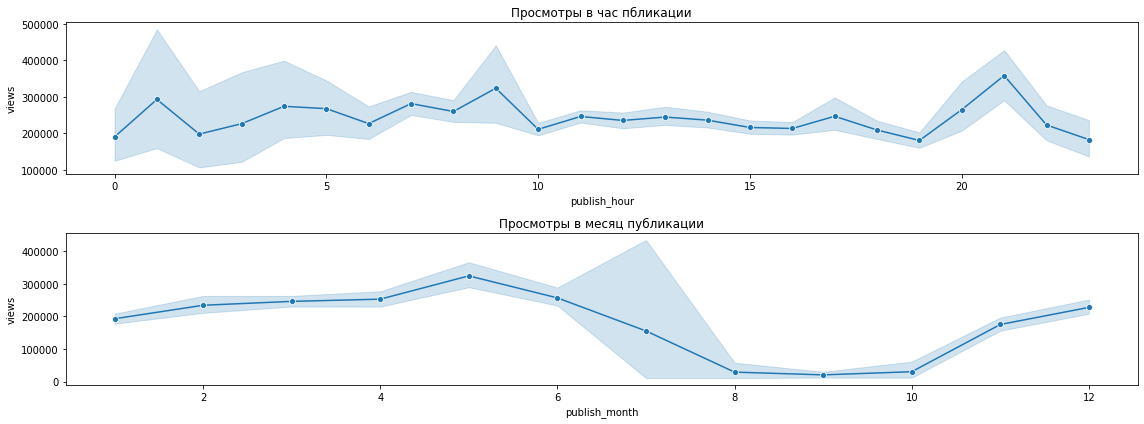

In [22]:
f,ax = plt.subplots(2,1, figsize=(16,6))

views_by_hour = sns.lineplot(x=df_r['publish_hour'], y=df_r['views'], data=df_r,marker='o', ax=ax[0],)
views_by_hour.set_title('Просмотры в час пбликации')

views_by_month= sns.lineplot(x=df_r['publish_month'], y=df_r['views'],data=df_r,marker='o', ax=ax[1])
views_by_month.set_title('Просмотры в месяц публикации')

plt.tight_layout()

In [23]:
norm_df_r = df_r.copy(deep=True)
norm_df_r['views']=np.log(df_r['views']+1)
norm_df_r['likes']=np.log(df_r['likes']+1)
norm_df_r['dislikes']=np.log(df_r['dislikes']+1)
norm_df_r['comment_count']=np.log(df_r['comment_count']+1)

## Без нормализации

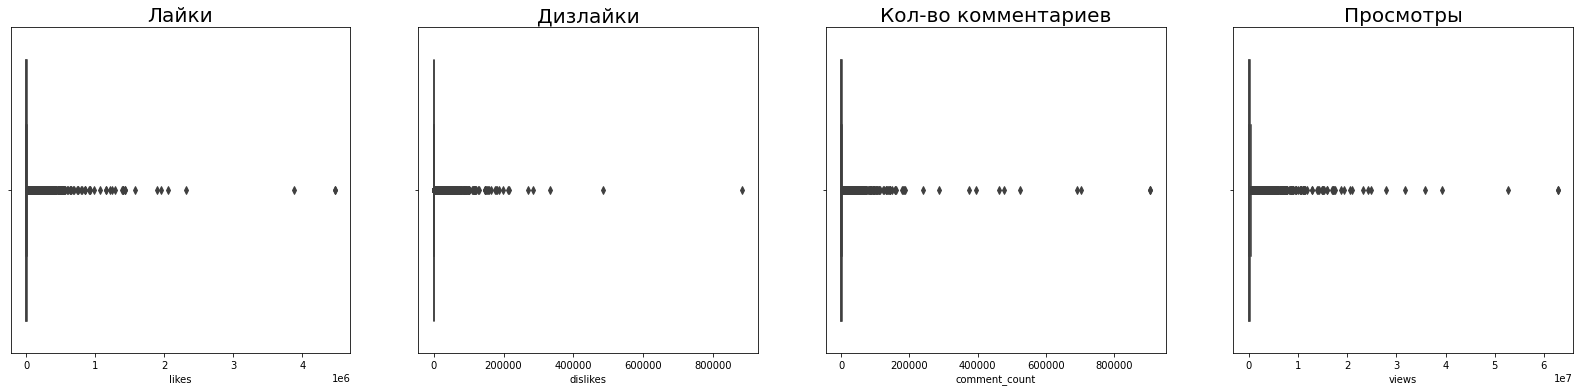

In [24]:
plt.figure(figsize=(28,6))

plt.subplot(141)
sns.boxplot(df_r['likes'])
plt.title("Лайки", fontsize=20)
plt.subplot(142)
sns.boxplot(df_r['dislikes'])
plt.title("Дизлайки", fontsize=20)
plt.subplot(143)
sns.boxplot(df_r['comment_count'])
plt.title("Кол-во комментариев", fontsize=20)
plt.subplot(144)
sns.boxplot(df_r['views'])
plt.title("Просмотры", fontsize=20)

plt.show()

## С нормализацией

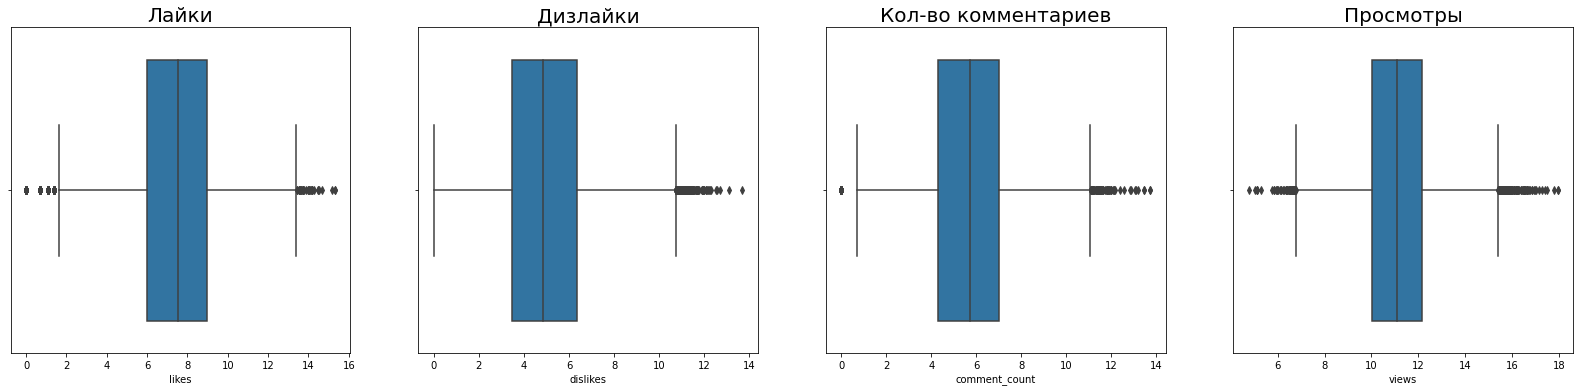

In [25]:
plt.figure(figsize=(28,6))

plt.subplot(141)
sns.boxplot(norm_df_r['likes'])
plt.title("Лайки", fontsize=20)
plt.subplot(142)
sns.boxplot(norm_df_r['dislikes'])
plt.title("Дизлайки", fontsize=20)
plt.subplot(143)
sns.boxplot(norm_df_r['comment_count'])
plt.title("Кол-во комментариев", fontsize=20)
plt.subplot(144)
sns.boxplot(norm_df_r['views'])
plt.title("Просмотры", fontsize=20)

plt.show()

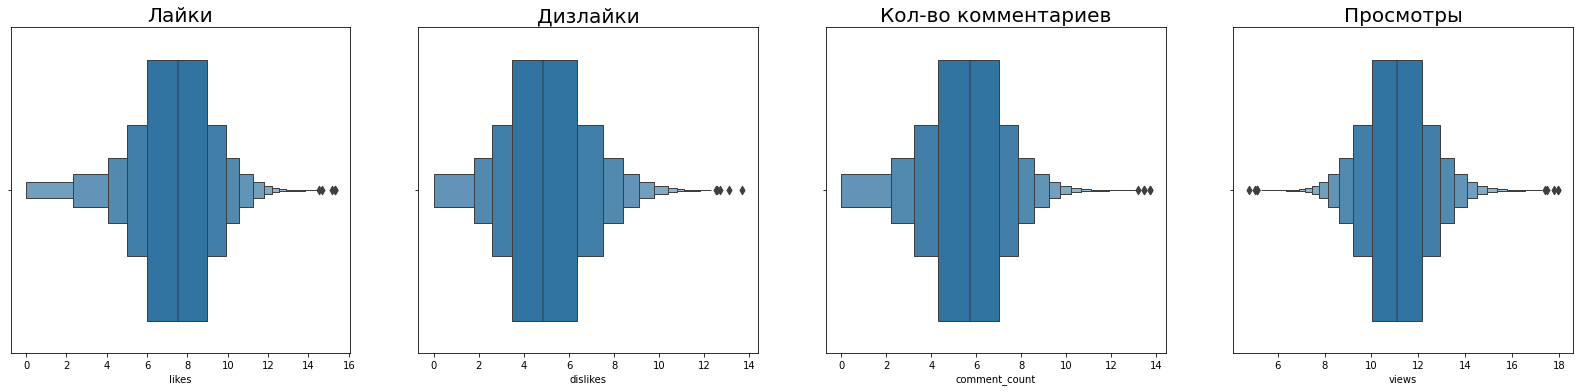

In [26]:
plt.figure(figsize=(28,6))

plt.subplot(141)
sns.boxenplot(norm_df_r['likes'])
plt.title("Лайки", fontsize=20)
plt.subplot(142)
sns.boxenplot(norm_df_r['dislikes'])
plt.title("Дизлайки", fontsize=20)
plt.subplot(143)
sns.boxenplot(norm_df_r['comment_count'])
plt.title("Кол-во комментариев", fontsize=20)
plt.subplot(144)
sns.boxenplot(norm_df_r['views'])
plt.title("Просмотры", fontsize=20)

plt.show()

## Посмотрим на каналы, чаще остальных попадающие в тренды

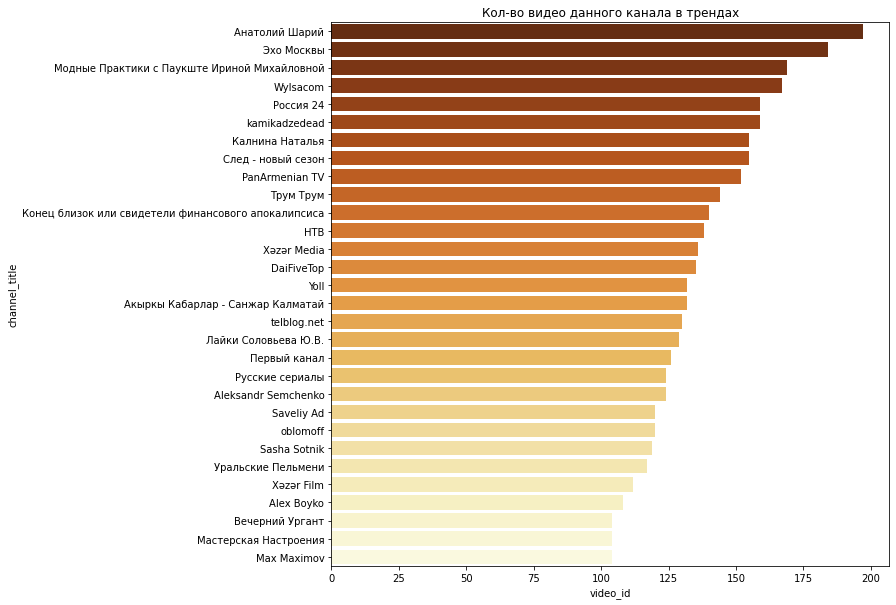

In [27]:
channel = df_r['channel_title'].value_counts().reset_index()
channel.columns = ['channel_title', 'video_id']

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x = "video_id", y = "channel_title", data = channel[:30], palette='YlOrBr_r').set_title('Кол-во видео данного канала в трендах')
plt.show()

# Спасибо за внимание !